In [1]:
import csv
import cv2
import numpy as np
import os

def process_files():
    lines = []
    with open('./data/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)
        for line in reader:
            lines.append(line)

    images = []
    measurements = []
    for line in lines:
        for line in lines:
            source_path = line[0]
            filename = source_path.split('/')[-1]
            current_path = './data/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)

    X_train = np.array(images)
    y_train = np.array(measurements)

# process_files()

In [2]:
# np.save('trial_X', X_train)
# np.save('trial_y', y_train)

In [3]:
X_train = np.load('trial_X.npy')
y_train = np.load('trial_y.npy')

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Lambda, ELU
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [5]:
def model_1():
    model = Sequential()
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
    model.add(Flatten())
    model.add(Dense(1))

    model.compile(loss = 'mse', optimizer = 'adam')
    model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)

    model.save('model_1.h5')

In [6]:
# model_1()

In [7]:
def model_nvidia():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape = (160,320,3)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Flatten())
    model.add(Dense(1164, init='he_normal'))
    model.add(ELU())
    model.add(Dense(100, init='he_normal'))
    model.add(ELU())
    model.add(Dense(50, init='he_normal'))
    model.add(ELU())
    model.add(Dense(10, init='he_normal'))
    model.add(ELU())
    model.add(Dense(1, init='he_normal'))
    
    model.compile(loss = 'mse', optimizer = 'adam')
    model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)

    model.save('model_nvidia.h5')

In [8]:
# model_nvidia()

In [9]:
import pandas as pd

data = pd.read_csv('./data/driving_log.csv')


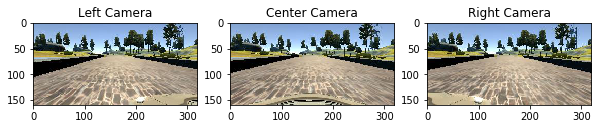

In [10]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def convert_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def read_image(path):
    return cv2.imread('data/' + path)

img_left = read_image(data['left'][0].strip())
img_center = read_image(data['center'][0].strip())
img_right = read_image(data['right'][0].strip())

import os

# print (data['left'][0].strip())
# print(data['center'][0])
# print(data['right'][0])

plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(convert_rgb(img_left))
plt.title('Left Camera')

plt.subplot(132)
plt.imshow(convert_rgb(img_center))
plt.title('Center Camera')

plt.subplot(133)
plt.imshow(convert_rgb(img_right))
plt.title('Right Camera')

plt.show()





In [11]:
data.head()
# print(len(data))

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


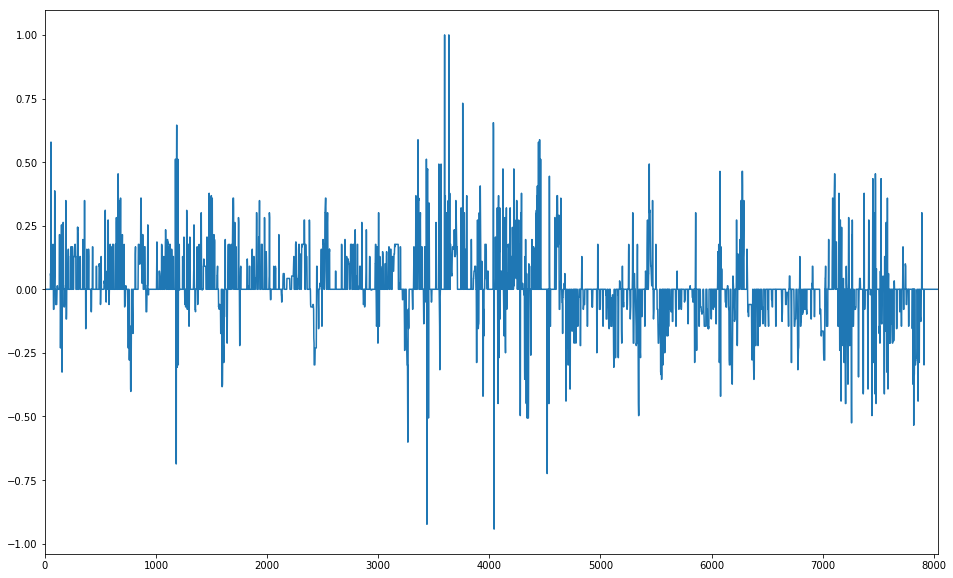

In [21]:
plt.figure(figsize=(16,10))
data['steering'].plot()
plt.show()

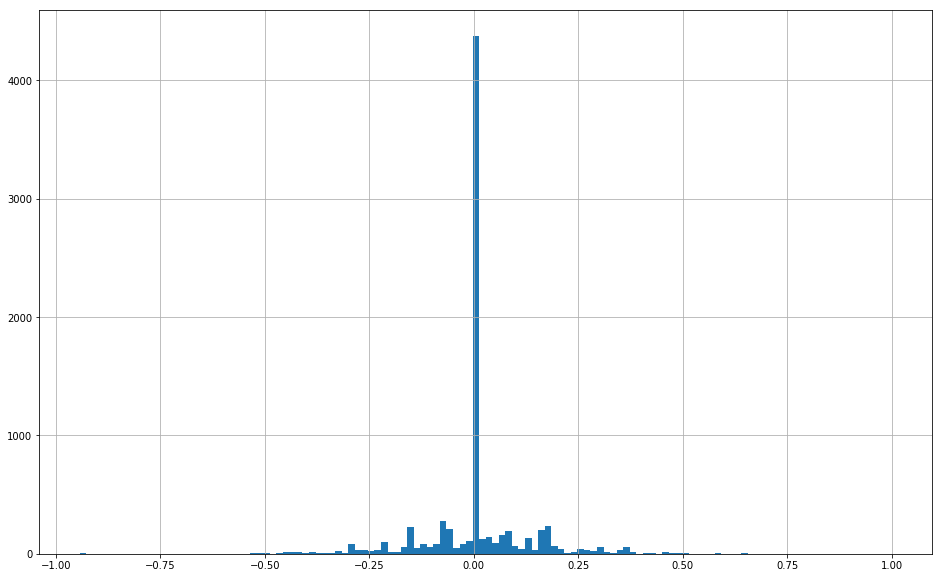

In [20]:
plt.figure(figsize=(16,10))
data['steering'].hist(bins = len(np.unique(data['steering'])))
plt.show()